In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('cardio_train.csv',delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df['age']=round(df['age']/365)

In [6]:
df['age']=df['age'].astype('int')

In [7]:
df.dtypes

id               int64
age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
df.drop(['id'],axis=1,inplace=True)

In [9]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
df['ap_hi'].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [11]:
df=df[df['ap_lo']<df['ap_hi']]

In [12]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
df[df['ap_hi']<70]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
13755,44,1,157,73.0,60,40,1,3,0,0,0,0
25454,49,2,176,73.0,12,0,1,1,0,0,1,0
26513,52,1,157,69.0,16,10,3,1,0,0,1,1
52580,60,1,155,66.0,13,0,1,1,0,0,1,0
52851,49,2,164,64.0,24,20,3,1,0,0,1,1
60106,62,1,167,74.0,15,-70,1,1,0,0,1,1


In [14]:
#Removing ap_hi which is less than 70
df=df[df['ap_hi']>70]
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
df[df['ap_lo']<50]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
418,46,1,157,72.0,150,30,1,1,0,0,1,1
507,46,1,165,64.0,140,40,1,1,0,0,1,1
2014,62,2,167,59.0,906,0,1,1,0,0,1,0
5333,57,1,164,102.0,120,30,2,1,0,0,1,0
6737,46,1,156,61.0,150,10,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
65303,65,2,176,99.0,120,0,1,3,0,0,1,1
67600,60,1,153,77.0,115,49,1,1,0,0,1,1
68223,52,2,173,100.0,130,20,1,1,0,0,1,1
68568,42,1,163,71.0,110,6,1,1,0,0,1,0


In [16]:
#Removing ap_lo which is less than 50
df=df[df['ap_lo']>50]
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
df['ap_hi'].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   123,   161,   147,   115,   137,   153,   148,
         105,   220,   119,   141,   165,   164,   124,   172,   902,
         162,   117,   134,   166,   176,   116,   121,   112,   113,
         118,   200,   155,   142,   131,   157,   136,   146,   138,
         159,   909,   109,    85,   106,   129,    93,   179,    95,
         156,   168,   132,   104,   103,   175,   128,   151,   139,
       11500,   127,   108,   144,   102,  1420,   210,   143,   701,
         107,   184,   178,   149,   167,   114,   101,  1500,   171,
         202,   111,   907,   188,   185,   163,   173,   154,   177,
         174, 14020,  1400,   240,   191,   197,  1620,   152,    96,
        1130,   193,    99,   196,   401, 16020,  1202,   906,  1300,
         230,   215,    97,  1409, 11020,   960, 13010,  1110,   195,
        1205,   187,

In [18]:
df[df['ap_lo']>150]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4781,52,1,158,74.0,200,170,1,1,0,0,1,1
4981,62,2,173,74.0,220,160,2,2,0,0,1,1
38022,60,1,161,84.0,196,182,2,2,0,0,1,1
43998,62,2,163,70.0,200,180,1,1,0,0,0,1
54987,53,1,169,80.0,200,160,3,3,0,0,1,0


In [19]:
#removing abnormal low bp greater than 150
df=df[df['ap_lo']<150]

In [20]:
df[df['ap_hi']>250]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1876,41,1,160,60.0,902,60,1,1,0,0,1,0
4817,40,1,168,63.0,909,60,2,1,0,0,1,0
7763,58,1,175,80.0,11500,90,1,1,0,0,1,1
8915,52,1,164,75.0,1420,80,2,1,0,0,1,1
9557,62,1,155,87.0,701,110,1,1,0,0,1,1
13895,44,1,168,72.0,1500,80,1,1,0,0,1,1
17713,61,2,163,50.0,907,70,3,3,0,0,1,1
25464,43,2,169,75.0,14020,80,2,1,0,0,1,1
25519,59,1,169,71.0,14020,80,3,3,0,0,1,1
25780,50,1,157,83.0,1400,80,1,1,0,0,1,1


In [21]:
df=df[df['ap_hi']<250]

In [22]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [23]:
#Frequency of target variable
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68589.000000,68589.000000,68589.000000,68589.000000,68589.000000,68589.000000,68589.000000,68589.000000,68589.000000,68589.000000,68589.000000,68589.000000
mean,53.330257,1.348788,164.365598,74.128821,126.690942,81.336074,1.364577,1.225692,0.087959,0.053361,0.803321,0.494846
std,6.766504,0.476590,8.183046,14.326998,16.652630,9.354725,0.678866,0.571610,0.283237,0.224755,0.397490,0.499977
min,30.000000,1.000000,55.000000,11.000000,80.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


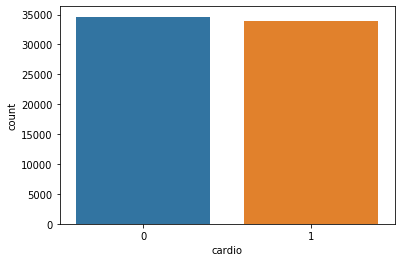

In [24]:
sns.countplot(df['cardio'])

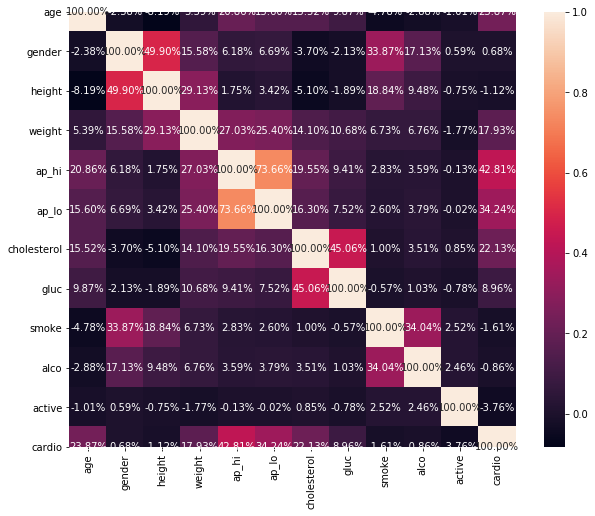

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2%')

In [26]:
#Bivariate analysis

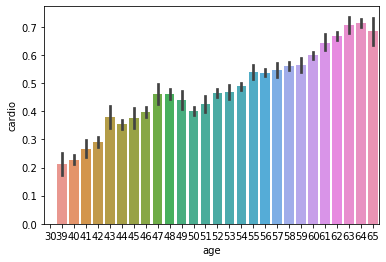

In [27]:
sns.barplot(df['age'],df['cardio'])

After the age of 50 the chances of getting heartattack increases.

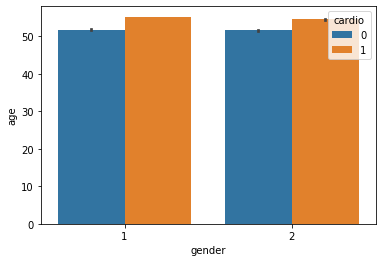

In [28]:
sns.barplot(df['gender'],df['age'],hue=df['cardio'])

After the age of 50, getting heart attack in both Male and Female is higher.

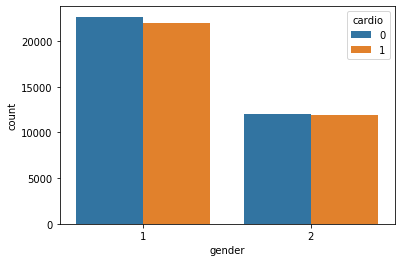

In [29]:
sns.countplot(df['gender'],hue=df['cardio'])

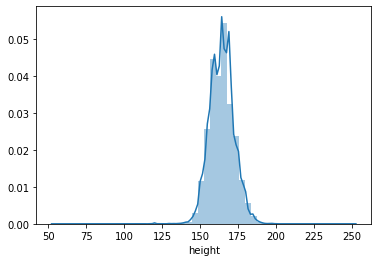

In [30]:
sns.distplot(df['height'],hist=True)

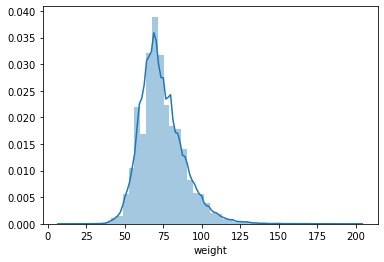

In [31]:
sns.distplot(df['weight'],hist=True)

In [32]:
df.drop(df[df['weight']<40].index,inplace=True)


In [33]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


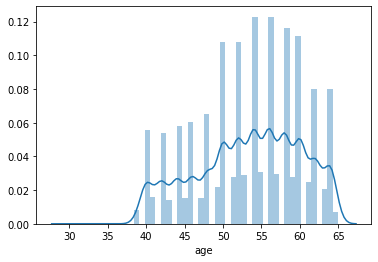

In [34]:
sns.distplot(df['age'],hist=True)

In [35]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

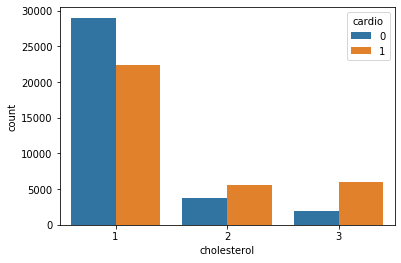

In [36]:
sns.countplot(df['cholesterol'],hue=df['cardio'])

In [37]:
df['gluc'].value_counts()

1    58281
3     5208
2     5052
Name: gluc, dtype: int64

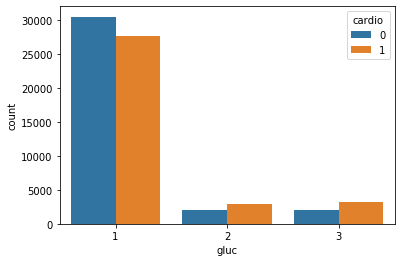

In [38]:
sns.countplot(df['gluc'],hue=df['cardio'])

<Figure size 1440x576 with 0 Axes>

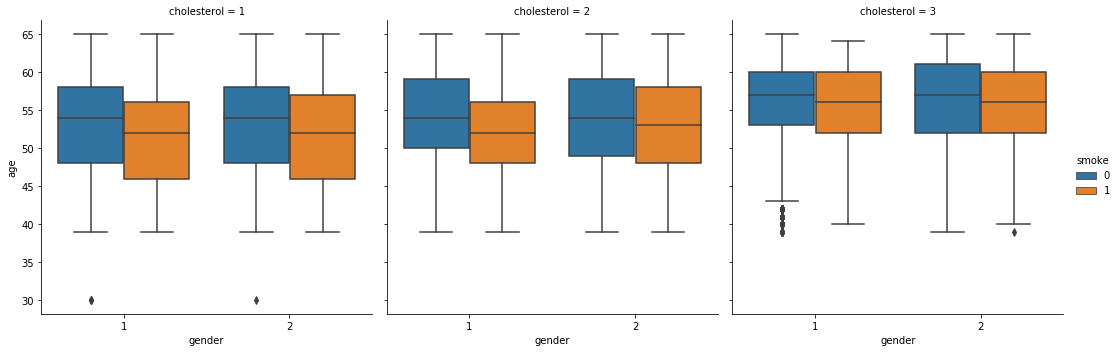

In [39]:
plt.figure(figsize=(20,8))
sns.catplot(x='gender',y='age',hue='smoke',col='cholesterol',kind='box',data=df)

<Figure size 1440x576 with 0 Axes>

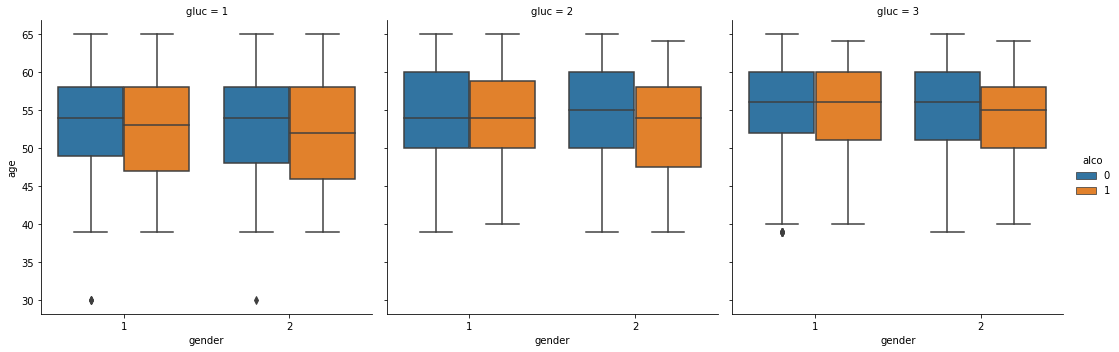

In [40]:
plt.figure(figsize=(20,8))
sns.catplot(x='gender',y='age',hue='alco',col='gluc',kind='box',data=df)

In [41]:
col=['gluc','alco','smoke','cholesterol']


In [42]:
data=pd.melt(df,id_vars='cardio',value_vars=df[col])
data

,cardio,variable,value
0,0,gluc,1
1,1,gluc,1
2,1,gluc,1
3,1,gluc,1
4,0,gluc,1
...,...,...,...
274159,0,cholesterol,1
274160,1,cholesterol,2
274161,1,cholesterol,3
274162,1,cholesterol,1


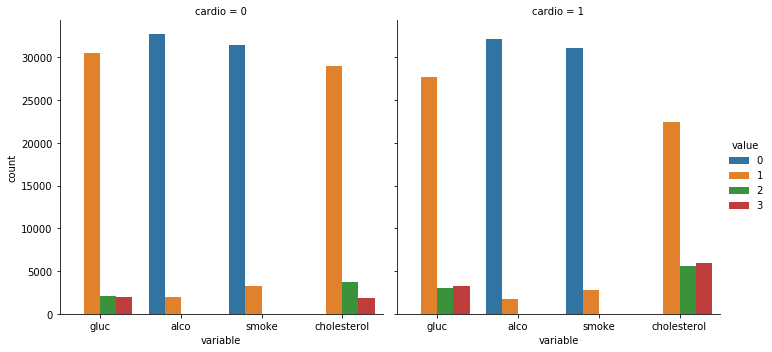

In [43]:
sns.catplot(x='variable',hue='value',col='cardio',data=data,kind='count')

In [44]:
X=df.iloc[:,:-1]

In [45]:
y=df.iloc[:,-1]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [48]:
X_train.shape

(54832, 11)

In [49]:
X_test.shape

(13709, 11)

In [50]:
y_train.shape

(54832,)

In [51]:
y_test.shape

(13709,)

Feature scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [54]:
X_train

array([[ 0.98560693,  1.36655863,  1.30269869, ..., -0.3113986 ,
        -0.2376831 , -2.02056538],
       [ 0.6901482 ,  1.36655863,  1.30269869, ..., -0.3113986 ,
        -0.2376831 ,  0.49491098],
       [ 0.39468947, -0.73176517,  0.812925  , ..., -0.3113986 ,
        -0.2376831 ,  0.49491098],
       ...,
       [ 0.98560693,  1.36655863,  0.812925  , ..., -0.3113986 ,
        -0.2376831 ,  0.49491098],
       [ 0.09923074, -0.73176517,  0.07826446, ..., -0.3113986 ,
         4.20728271,  0.49491098],
       [ 0.09923074, -0.73176517, -0.04417896, ..., -0.3113986 ,
        -0.2376831 ,  0.49491098]])

In [55]:
X_test

array([[-0.78714544, -0.73176517, -1.51350003, ..., -0.3113986 ,
        -0.2376831 , -2.02056538],
       [ 0.6901482 ,  1.36655863,  0.69048158, ..., -0.3113986 ,
        -0.2376831 , -2.02056538],
       [ 0.39468947, -0.73176517, -0.04417896, ..., -0.3113986 ,
        -0.2376831 ,  0.49491098],
       ...,
       [ 0.24696011, -0.73176517, -0.53395265, ..., -0.3113986 ,
        -0.2376831 ,  0.49491098],
       [-0.49168671, -0.73176517,  0.69048158, ..., -0.3113986 ,
        -0.2376831 ,  0.49491098],
       [-0.49168671, -0.73176517, -0.16662238, ..., -0.3113986 ,
        -0.2376831 , -2.02056538]])

Model Building

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [58]:
#Evaluation

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [60]:
print('Train Data')
print(confusion_matrix(y_train,y_pred_train))
print('Test Data')
print(confusion_matrix(y_test,y_pred_test))

Train Data
[[21702  5932]
 [ 9014 18184]]
Test Data
[[5498 1485]
 [2229 4497]]


In [61]:
print('Train Data')
print(accuracy_score(y_train,y_pred_train))
print('Test Data')
print(accuracy_score(y_test,y_pred_test))

Train Data
0.7274219433907207
Test Data
0.7290830841053323


In [62]:
y_train_proba=reg.predict_proba(X_train)[:,1]
y_train_proba

array([0.82381899, 0.52746817, 0.79597309, ..., 0.89021242, 0.2903451 ,
       0.53525386])

In [63]:
y_test_proba=reg.predict_proba(X_test)[:,1]
y_test_proba

array([0.14771914, 0.63058818, 0.80860894, ..., 0.35517318, 0.68627969,
       0.55309573])

#Confusion Matrix
Type I and Type II Error

In [64]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [65]:
#Classisication Report

In [66]:
from sklearn.metrics import classification_report

In [67]:
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.71      0.79      0.74     27634
           1       0.75      0.67      0.71     27198

    accuracy                           0.73     54832
   macro avg       0.73      0.73      0.73     54832
weighted avg       0.73      0.73      0.73     54832

Test Data
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6983
           1       0.75      0.67      0.71      6726

    accuracy                           0.73     13709
   macro avg       0.73      0.73      0.73     13709
weighted avg       0.73      0.73      0.73     13709



In [68]:
#PR Curve

In [69]:
from sklearn.metrics import precision_recall_curve

In [70]:
p,r,th=precision_recall_curve(y_train,y_train_proba)

In [71]:
p.shape

(50975,)

In [72]:
r.shape

(50975,)

In [73]:
th.shape

(50974,)

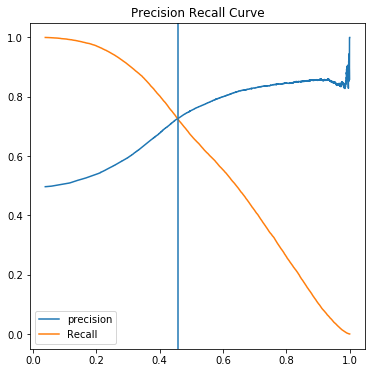

In [74]:
plt.figure(figsize=(6,6))
sns.lineplot(x=th,y=p[:-1],label='precision')
sns.lineplot(x=th,y=r[:-1],label='Recall')
plt.title('Precision Recall Curve')
plt.axvline(0.457)
plt.show()

In [75]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score 

In [76]:
def metrics(y_actual,y_proba,th):
    y_pred_temp=[1 if p>th else 0 for p in y_proba]
    accuracy=accuracy_score(y_actual,y_pred_temp)
    recall=recall_score(y_actual,y_pred_temp)
    precision=precision_score(y_actual,y_pred_temp)
    f1=f1_score(y_actual,y_pred_temp)
    roc_auc=roc_auc_score(y_actual,y_pred_temp)
    return {"Accuracy":round(accuracy,2),'Recall':round(recall,2),'Precision':round(precision,2),'F1_Score':round(f1,2),'ROC_AUC':round(roc_auc,2)}

In [77]:
print("Train Data")
print(metrics(y_train,y_train_proba,0.457))
print("Test Data")
print(metrics(y_test,y_test_proba,0.457))

Train Data
{'Accuracy': 0.73, 'Recall': 0.73, 'Precision': 0.73, 'F1_Score': 0.73, 'ROC_AUC': 0.73}
Test Data
{'Accuracy': 0.73, 'Recall': 0.72, 'Precision': 0.72, 'F1_Score': 0.72, 'ROC_AUC': 0.73}


In [78]:
from sklearn.metrics import roc_curve,auc

In [80]:
fpr,tpr,th=roc_curve(y_train,y_train_proba)

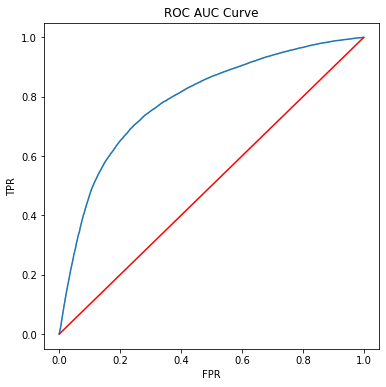

In [85]:
plt.figure(figsize=(6,6))
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0.0,1],y=[0.0,1],color='red',linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC AUC Curve')
plt.show()

In [82]:
auc(fpr,tpr)

0.7906802851799166